In [55]:
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import calendar
import datetime as dt
import datetime
import pickle
import azureml.train.automl
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from math import sqrt
from lifelines.utils import k_fold_cross_validation
from dateutil.relativedelta import relativedelta
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

In [57]:
# Reading the data which was downloaded from EDL PROD using beeline
df = pd.read_csv('EDL_Train.csv')
print(df.shape)

(3535397, 95)


In [58]:
df.head()

,train_data_t2p.customer_nbr,train_data_t2p.country_code,train_data_t2p.invoice_nbr,train_data_t2p.invoice_base_amount,train_data_t2p.commited_days,train_data_t2p.payment_term,train_data_t2p.invoice_category,train_data_t2p.delay_status,train_data_t2p.dso2,train_data_t2p.invoice_oks,train_data_t2p.tm_invoice,train_data_t2p.om_invoice,train_data_t2p.hsr_sca_invoice,train_data_t2p.sca_invoice,train_data_t2p.saas_oks_invoice,train_data_t2p.hsr_tm_invoice,train_data_t2p.hsr_invoice_oks,train_data_t2p.hsr_om_invoice,train_data_t2p.other_invoice_type_name,train_data_t2p.finance,train_data_t2p.retail,train_data_t2p.hospitality,train_data_t2p.t_and_t,train_data_t2p.tlg,train_data_t2p.financial_banking_cfi,train_data_t2p.financial_banking_major,train_data_t2p.financial_channel,train_data_t2p.financial_other_financial_serv,train_data_t2p.hospitality_channel,train_data_t2p.hospitality_eating_drinking_qs,train_data_t2p.hospitality_eating_drinking_ts,train_data_t2p.hospitality_sports_recreation,train_data_t2p.retail_channel,train_data_t2p.retail_cstore_and_petroleum,train_data_t2p.retail_distribution_wholesale,train_data_t2p.retail_drug,train_data_t2p.retail_food_and_mass,train_data_t2p.retail_public_sector,train_data_t2p.retail_specialty_retail,train_data_t2p.t_and_t_technology,train_data_t2p.t_and_t_telecom,train_data_t2p.tlg_channel,train_data_t2p.tlg_gaming,train_data_t2p.tlg_lodging,train_data_t2p.tlg_travel,train_data_t2p.other_industry,train_data_t2p.invoice_date,train_data_t2p.aging_date,train_data_t2p.payment_due_date,train_data_t2p.actual_date_closed,train_data_t2p.day_of_month_created,train_data_t2p.month_num_created,train_data_t2p.day_of_week_created,train_data_t2p.day_of_month_due,train_data_t2p.month_num_due,train_data_t2p.day_of_week_due,train_data_t2p.day_of_month_age,train_data_t2p.month_num_age,train_data_t2p.day_of_week_age,train_data_t2p.me_due_date,train_data_t2p.me_inv_date,train_data_t2p.mme_due_date,train_data_t2p.mme_inv_date,train_data_t2p.count_prepaid_invoices,train_data_t2p.ratio_prepaid_invoices,train_data_t2p.count_paid_invoices,train_data_t2p.count_delayed_invoices,train_data_t2p.ratio_delayed_invoices,train_data_t2p.paid_invoices_amount_us,train_data_t2p.delayed_paid_invoices_amount,train_data_t2p.ratio_late_paid_amount,train_data_t2p.avg_days_late_paid_invoices_closed,train_data_t2p.count_outstanding_invoices,train_data_t2p.count_delayed_outstanding_invoices,train_data_t2p.ratio_outstanding_invoices,train_data_t2p.outstanding_invoices_amount,train_data_t2p.delayed_outstanding_invoices_amount,train_data_t2p.ratio_late_outstanding_amount,train_data_t2p.avg_days_late_outstanding_invoices_open,train_data_t2p.closed_bucket_0,train_data_t2p.closed_bucket_1,train_data_t2p.closed_bucket_2,train_data_t2p.closed_bucket_3,train_data_t2p.closed_bucket_4,train_data_t2p.open_60_more,train_data_t2p.total_invoice_lines,train_data_t2p.hw,train_data_t2p.sw,train_data_t2p.swm,train_data_t2p.hwm,train_data_t2p.ps,train_data_t2p.ts,train_data_t2p.other_category,train_data_t2p.paid_status,train_data_t2p.customer_segment
0,10000209,1,800122721,511.000,3,1,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-06-14,2019-06-14,2019-06-17,2019-06-17,14,6,4.000,17,6,0.000,14,6,4.000,0,0,0,1,0,0.000,43,20,0.470,18893.430,8948.630,0.470,1.400,0.000,0,0.000,0.000,0.000,0.000,0.000,23,20,0,0,0,0,4,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1
1,10000209,1,800135628,365.230,3,1,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-11-12,2019-11-12,2019-11-15,2019-11-15,12,11,1.000,15,11,4.000,12,11,1.000,0,0,0,1,0,0.000,43,20,0.470,18893.430,8948.630,0.470,1.400,0.000,0,0.000,0.000,0.000,0.000,0.000,23,20,0,0,0,0,4,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1
2,10000210,1,6500790618,266.000,30,1,0,4,250,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-09-13,2018-09-13,2018-10-13,2019-05-21,13,9,3.000,13,10,5.000,13,9,3.000,0,0,1,1,0,0.000,22,6,0.2

In [59]:
#Changing the name of the columns 
df.columns = df.columns.str.replace(r'train_data_t2p.', '')

In [60]:
df.head()

,customer_nbr,country_code,invoice_nbr,invoice_base_amount,commited_days,payment_term,invoice_category,delay_status,dso2,invoice_oks,tm_invoice,om_invoice,hsr_sca_invoice,sca_invoice,saas_oks_invoice,hsr_tm_invoice,hsr_invoice_oks,hsr_om_invoice,other_invoice_type_name,finance,retail,hospitality,t_and_t,tlg,financial_banking_cfi,financial_banking_major,financial_channel,financial_other_financial_serv,hospitality_channel,hospitality_eating_drinking_qs,hospitality_eating_drinking_ts,hospitality_sports_recreation,retail_channel,retail_cstore_and_petroleum,retail_distribution_wholesale,retail_drug,retail_food_and_mass,retail_public_sector,retail_specialty_retail,t_and_t_technology,t_and_t_telecom,tlg_channel,tlg_gaming,tlg_lodging,tlg_travel,other_industry,invoice_date,aging_date,payment_due_date,actual_date_closed,day_of_month_created,month_num_created,day_of_week_created,day_of_month_due,month_num_due,day_of_week_due,day_of_month_age,month_num_age,day_of_week_age,me_due_date,me_inv_date,mme_due_date,mme_inv_date,count_prepaid_invoices,ratio_prepaid_invoices,count_paid_invoices,count_delayed_invoices,ratio_delayed_invoices,paid_invoices_amount_us,delayed_paid_invoices_amount,ratio_late_paid_amount,avg_days_late_paid_invoices_closed,count_outstanding_invoices,count_delayed_outstanding_invoices,ratio_outstanding_invoices,outstanding_invoices_amount,delayed_outstanding_invoices_amount,ratio_late_outstanding_amount,avg_days_late_outstanding_invoices_open,closed_bucket_0,closed_bucket_1,closed_bucket_2,closed_bucket_3,closed_bucket_4,open_60_more,total_invoice_lines,hw,sw,swm,hwm,ps,ts,other_category,paid_status,customer_segment
0,10000209,1,800122721,511.000,3,1,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-06-14,2019-06-14,2019-06-17,2019-06-17,14,6,4.000,17,6,0.000,14,6,4.000,0,0,0,1,0,0.000,43,20,0.470,18893.430,8948.630,0.470,1.400,0.000,0,0.000,0.000,0.000,0.000,0.000,23,20,0,0,0,0,4,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1
1,10000209,1,800135628,365.230,3,1,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-11-12,2019-11-12,2019-11-15,2019-11-15,12,11,1.000,15,11,4.000,12,11,1.000,0,0,0,1,0,0.000,43,20,0.470,18893.430,8948.630,0.470,1.400,0.000,0,0.000,0.000,0.000,0.000,0.000,23,20,0,0,0,0,4,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1
2,10000210,1,6500790618,266.000,30,1,0,4,250,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-09-13,2018-09-13,2018-10-13,2019-05-21,13,9,3.000,13,10,5.000,13,9,3.000,0,0,1,1,0,0.000,22,6,0.270,6704.000,1596.500,0.240,59.330,0.000,0,0.000,0.000,0.000,0.000,0.000,16,4,0,0,2,0,20,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1
3,10000716,1,6501127642,320.000,30,1,0,0,30,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-07-10,2019-07-10,2019-08-09,2019-08-09,10,7,2.000,9,8,4.000,10,7,2.000,0,0,1,1,0,0.000,20,8,0.400,17135.000,13465.000,0.790,23.750,0.000,0,0.000,0.000,0.000,0.000,0.000,12,6,1,0,1,0,16,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1
4,10000719,1,6500928201,136.000,30,1,0,0,30,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-01-14,2019-01-14,2019-02-13,2019-02-13,14,1,0.000,13,2,2.000,14,1,0.000,0,0,0,1,2,0.130,16,5,0.310,2562.500,1066.500,0.420,17.200,6.000,6,1.000,817.500,817.500,1.000,97.330,11,4,1,0,0,4,4,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1


In [61]:
df.dtypes

customer_nbr                                object
country_code                                 int64
invoice_nbr                                 object
invoice_base_amount                        float64
commited_days                                int64
payment_term                                 int64
invoice_category                             int64
delay_status                                 int64
dso2                                         int64
invoice_oks                                  int64
tm_invoice                                   int64
om_invoice                                   int64
hsr_sca_invoice                              int64
sca_invoice                                  int64
saas_oks_invoice                             int64
hsr_tm_invoice                               int64
hsr_invoice_oks                              int64
hsr_om_invoice                               int64
other_invoice_type_name                      int64
finance                        

In [62]:
df['customer_nbr'] = df['customer_nbr'].astype(str)
df['invoice_nbr'] = df['invoice_nbr'].astype(str)

In [63]:
print('Total Unique Customers we are training on : ', df.customer_nbr.nunique())

Total Unique Customers we are training on :  38443


In [64]:
df.groupby('customer_segment')['customer_nbr'].nunique()

customer_segment
0     3768
1    34675
Name: customer_nbr, dtype: int64

In [65]:
# Creating new derived fields
df["ratio_closed_0"] = df["closed_bucket_0"]/df["count_paid_invoices"]
df["ratio_closed_1"] = df["closed_bucket_1"]/df["count_paid_invoices"]
df["ratio_closed_2"] = df["closed_bucket_2"]/df["count_paid_invoices"]
df["ratio_closed_3"] = df["closed_bucket_3"]/df["count_paid_invoices"]
df["ratio_closed_4"] = df["closed_bucket_4"]/df["count_paid_invoices"]

In [66]:
df.head()

,customer_nbr,country_code,invoice_nbr,invoice_base_amount,commited_days,payment_term,invoice_category,delay_status,dso2,invoice_oks,tm_invoice,om_invoice,hsr_sca_invoice,sca_invoice,saas_oks_invoice,hsr_tm_invoice,hsr_invoice_oks,hsr_om_invoice,other_invoice_type_name,finance,retail,hospitality,t_and_t,tlg,financial_banking_cfi,financial_banking_major,financial_channel,financial_other_financial_serv,hospitality_channel,hospitality_eating_drinking_qs,hospitality_eating_drinking_ts,hospitality_sports_recreation,retail_channel,retail_cstore_and_petroleum,retail_distribution_wholesale,retail_drug,retail_food_and_mass,retail_public_sector,retail_specialty_retail,t_and_t_technology,t_and_t_telecom,tlg_channel,tlg_gaming,tlg_lodging,tlg_travel,other_industry,invoice_date,aging_date,payment_due_date,actual_date_closed,day_of_month_created,month_num_created,day_of_week_created,day_of_month_due,month_num_due,day_of_week_due,day_of_month_age,month_num_age,day_of_week_age,me_due_date,me_inv_date,mme_due_date,mme_inv_date,count_prepaid_invoices,ratio_prepaid_invoices,count_paid_invoices,count_delayed_invoices,ratio_delayed_invoices,paid_invoices_amount_us,delayed_paid_invoices_amount,ratio_late_paid_amount,avg_days_late_paid_invoices_closed,count_outstanding_invoices,count_delayed_outstanding_invoices,ratio_outstanding_invoices,outstanding_invoices_amount,delayed_outstanding_invoices_amount,ratio_late_outstanding_amount,avg_days_late_outstanding_invoices_open,closed_bucket_0,closed_bucket_1,closed_bucket_2,closed_bucket_3,closed_bucket_4,open_60_more,total_invoice_lines,hw,sw,swm,hwm,ps,ts,other_category,paid_status,customer_segment,ratio_closed_0,ratio_closed_1,ratio_closed_2,ratio_closed_3,ratio_closed_4
0,10000209,1,800122721,511.000,3,1,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-06-14,2019-06-14,2019-06-17,2019-06-17,14,6,4.000,17,6,0.000,14,6,4.000,0,0,0,1,0,0.000,43,20,0.470,18893.430,8948.630,0.470,1.400,0.000,0,0.000,0.000,0.000,0.000,0.000,23,20,0,0,0,0,4,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1,0.535,0.465,0.000,0.000,0.000
1,10000209,1,800135628,365.230,3,1,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-11-12,2019-11-12,2019-11-15,2019-11-15,12,11,1.000,15,11,4.000,12,11,1.000,0,0,0,1,0,0.000,43,20,0.470,18893.430,8948.630,0.470,1.400,0.000,0,0.000,0.000,0.000,0.000,0.000,23,20,0,0,0,0,4,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1,0.535,0.465,0.000,0.000,0.000
2,10000210,1,6500790618,266.000,30,1,0,4,250,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-09-13,2018-09-13,2018-10-13,2019-05-21,13,9,3.000,13,10,5.000,13,9,3.000,0,0,1,1,0,0.000,22,6,0.270,6704.000,1596.500,0.240,59.330,0.000,0,0.000,0.000,0.000,0.000,0.000,16,4,0,0,2,0,20,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1,0.727,0.182,0.000,0.000,0.091
3,10000716,1,6501127642,320.000,30,1,0,0,30,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-07-10,2019-07-10,2019-08-09,2019-08-09,10,7,2.000,9,8,4.000,10,7,2.000,0,0,1,1,0,0.000,20,8,0.400,17135.000,13465.000,0.790,23.750,0.000,0,0.000,0.000,0.000,0.000,0.000,12,6,1,0,1,0,16,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1,0.600,0.300,0.050,0.000,0.050
4,10000719,1,6500928201,136.000,30,1,0,0,30,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-01-14,2019-01-14,2019-02-13,2019-02-13,14,1,0.000,13,2,2.000,14,1,0.000,0,0,0,1,2,0.130,16,5,0.310,2562.500,1066.500,0.420,17.200,6.000,6,1.000,817.500,817.500,1.000,97.330,11,4,1,0,0,4,4,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1,0.688,0.250,0.062,0.000,0.000


In [68]:
print('Shape of Dataset : ', df.shape)

Shape of Dataset :  (3535397, 100)


In [69]:
df.customer_segment.value_counts()

0    2727188
1     808209
Name: customer_segment, dtype: int64

In [70]:
# Drilling down for only lesser value customers

df = df.loc[df['customer_segment'] == 1]

In [72]:
print('Shape of Dataset :', df.shape)

Shape of Dataset : (808209, 100)


In [87]:
# Feature Selection for Model
train = df[['country_code','invoice_base_amount','commited_days', 'invoice_category', 'dso2', 'financial_banking_cfi',
            'financial_banking_major', 'financial_channel', 'financial_other_financial_serv','hospitality_channel',
            'hospitality_eating_drinking_qs','hospitality_eating_drinking_ts','hospitality_sports_recreation','retail_channel',
            'retail_cstore_and_petroleum','retail_distribution_wholesale','retail_drug','retail_food_and_mass',
            'retail_public_sector','retail_specialty_retail','t_and_t_technology','tlg_channel',
            'tlg_gaming','tlg_lodging','tlg_travel',
            'month_num_created','day_of_week_created','day_of_month_due','month_num_due','day_of_week_due',
            'ratio_late_paid_amount',
            'ratio_closed_0', 'ratio_closed_1', 'ratio_closed_2', 'ratio_closed_3', 'ratio_closed_4', 
            'hw','sw','swm','hwm','ps','ts','other_category','paid_status']]

In [88]:
print('Shape of Dataset :', train.shape)

Shape of Dataset : (808209, 44)


In [89]:
# Dropping duplicates and replacing nulls with 0. 
#The nulls are due to only because count of paid invoices are 0 for some customers. Thus we can replace their ratio's by 0.
train2 = train.drop_duplicates()
train3 = train2.fillna(0)
print('After dropping duplicates : ', train2.shape)
print('After replacing nulls with 0: ', train3.shape)

After dropping duplicates :  (456648, 44)
After replacing nulls with 0:  (456648, 44)


In [90]:
# Calculating the correleation matrix
corr = train3.corr()

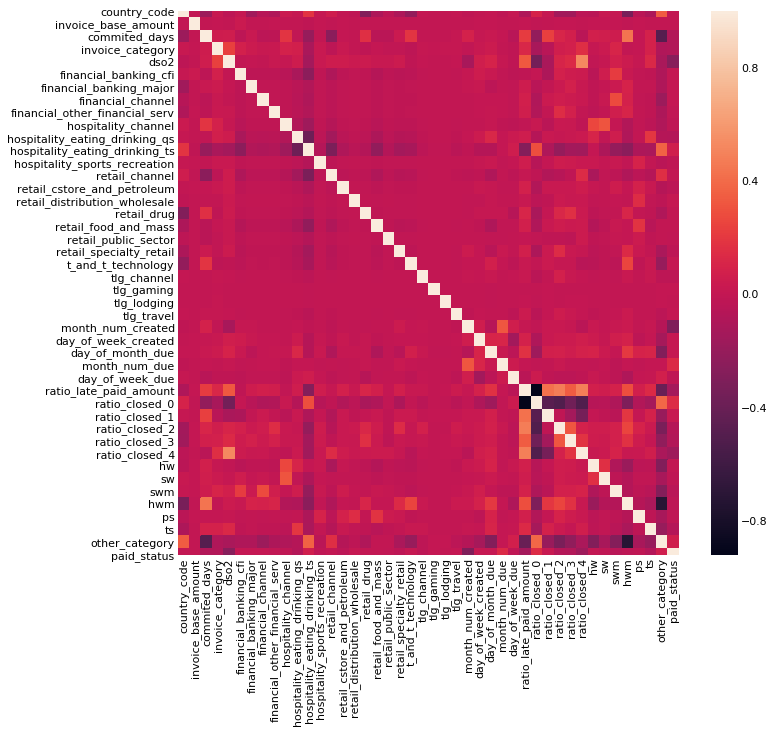

In [91]:
#Plotting a correleation heatmap
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)

In [92]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [93]:
#Initializing Model with required L2 Regularization
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.001)

# Cross validation and scores
scores = k_fold_cross_validation(cph, train3, duration_col='dso2', event_col='paid_status', k=10)
print('Printing all 10 cross validated scores : ', scores)
print('Mean of scores :', np.mean(scores))
print('Standard Deviation of scores :', np.std(scores))

Printing all 10 cross validated scores :  [0.7954185534018166, 0.7945113724557742, 0.7932308520670442, 0.7909518371088842, 0.795018438480926, 0.7919922686197354, 0.7918217295937428, 0.7941275159568801, 0.7951200276856439, 0.7953242485235836]
Mean of scores : 0.793751684389403
Standard Deviation of scores : 0.001561329412929961


In [94]:
#Final fitting of the Model
cph = CoxPHFitter(penalizer=0.001)
#Final total fit and score
cph.fit(train3, duration_col='dso2', event_col='paid_status')
print('Final Concordance Score : ', cph.score_)

Final Concordance Score :  0.7937933537967427


In [95]:
cph.print_summary()

model,lifelines.CoxPHFitter
duration col,'dso2'
event col,'paid_status'
penalizer,0.001
number of observations,456648
number of events observed,368992
partial log-likelihood,-4392995.95
time fit was run,2020-02-18 13:24:34 UTC


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
country_code,-0.06,0.94,0.01,-0.08,-0.05,0.92,0.95,-7.02,<0.005,38.71
invoice_base_amount,-0.00,1.00,0.00,-0.00,0.00,1.00,1.00,-1.01,0.31,1.67
commited_days,-0.03,0.97,0.00,-0.03,-0.03,0.97,0.97,-175.54,<0.005,inf
invoice_category,-0.64,0.53,0.01,-0.66,-0.62,0.52,0.54,-68.33,<0.005,inf
financial_banking_cfi,-0.63,0.53,0.01,-0.65,-0.60,0.52,0.55,-47.01,<0.005,inf
financial_banking_major,-0.60,0.55,0.02,-0.64,-0.56,0.53,0.57,-27.28,<0.005,542.10
financial_channel,-0.62,0.54,0.02,-0.66,-0.58,0.52,0.56,-29.97,<0.005,653.09
financial_other_financial_serv,-1.02,0.36,0.02,-1.07,-0.97,0.34,0.38,-43.19,<0.005,inf
hospitality_channel,-0.76,0.47,0.02,-0.78,-0.73,0.46,0.48,-50.16,<0.005,inf
hospitality_eating_drinking_qs,-0.99,0.37,0.01,-1.02,-0.97,0.36,0.38,-80.77,<0.005,inf


In [96]:
import pickle
filename = 'Survival_Model_EDL_Data.pkl'
pickle.dump(cph, open(filename, 'wb'))